# Predicting Diabetes

<img src="files/diabetes.png">

## The Big Picture

 - Diabetes is a leading cause of death in the world
 - Diabetes is a condition that is caused by the lack of production of insulin in the body or lack of enough production of insulin or resistance to insulin. Insulin is a hormone which allows the body to turn blood sugar (glucose) into energy.
 - 1 in 5 of the people who are above 65 years old have diabetes
 - More than 88 million US adults—over a third—have prediabetes,      and more than 84% of them <u>don’t know they have it.</u>
 - In 2019, Diabetes caused 4.2 million deaths
 - Diabetes is a major cause of blindness, kidney failure, heart attacks, stroke and lower limb amputation.
 - In the last 20 years, the number of adults diagnosed with diabetes has more than doubled as the American population has aged and become more overweight or obese

## Why bother predicting diabetes then?

- Unfortunately, no cure for diabetes currently exists: there is no treatment that will eliminate the disease completely. 
- Both type 1 and type 2 diabetes are chronic, lifelong conditions
- Because it is such a big health issue, there’s a lot of research looking at how to cure diabetes. Research focuses on the autoimmune process in type 1 diabetes, genetic factors, and how to make new pancreas cells
- Now, imagine if we were able to predict diabetes at an early stage: we can alert the patients at an early age which could help them adapt major lifestyle and behavior changes that can eventually reverse certain aspects of the disease 
- Research shows that the most lasting “reversals” only happen with significant and sustained lifestyle changes

## The Dataset

- The objective of this tutorial is to predict diabetes using a dataset provided originally by the National Institute of Diabetes and Digestive and Kidney Diseases
- This dataset is a collection of different diagonstic information on 768 women over the age of 21. Each row is a different patient. Every patient in this dataset has Pima Indian heritage. [Pima Indians](https://en.wikipedia.org/wiki/Pima_people) are a group of Native Americans living in southern Arizona and Northern Mexico and are at high [risk](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4418458/) for diabetes and especially type 2 diabetes due to various genetic determinants for diabetes. 
- The dataset can be found on the [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) website
- The dataset can be used to predict whether a patient has diabetes based on certain diagnostic factor such as Insulin, Glucose, Blood Pressure, Age, BMI, Number of Preganancies, and the Diabetest Pedigree Function
- The outcome column in the dataset indicates whether a person is diabetic or not: 1 if diabetic, 0 if not

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.formula.api import logit

In [2]:
#Reading the dataset

df = pd.read_csv('diabetes.csv')

In [3]:
#Getting an overview of the dataset by printing the 1st five rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#The pandas describe() function is used to view some basic statistical details like percentile, mean, std etc. 
#of a data frame.

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Inference:
- A strange thing to note from the above table is that the minimum value of Blood Pressure, Glucose, Skin Thickness, 
  Insulin and BMI is 0.
- Glucose and such other important features can never be zero in human body.
- So in the data preprocessing section, we need to take this into account carefully and find a suitable method to       replace these zero values. 
- In short, these zero values are basically missing values to us.

In [5]:
#Check for any additional null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Now that we know the important input features have a minimum value of 0, let's get a total count of how many 
#zeros are present in every input feature.

column_names = df.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df[df[name] == 0])))


Number of zeros in Pregnancies = 111
Number of zeros in Glucose = 5
Number of zeros in BloodPressure = 35
Number of zeros in SkinThickness = 227
Number of zeros in Insulin = 374
Number of zeros in BMI = 11
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 500


In [7]:
#Getting an overview of how each input feature is correlated to the outcome

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


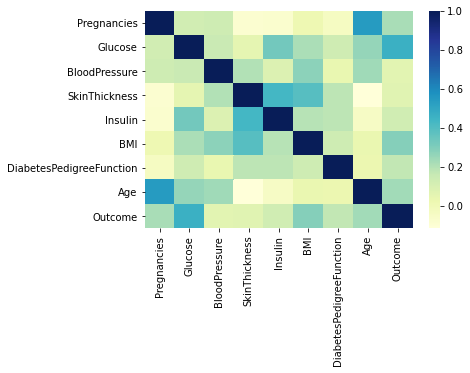

In [8]:
#Translating the above correlation table into a heatmap to get a better sense of intuition

sns.heatmap(df.corr(), cmap="YlGnBu")
sns.set(rc={'figure.figsize':(10,10)})

<AxesSubplot:xlabel='Outcome', ylabel='count'>

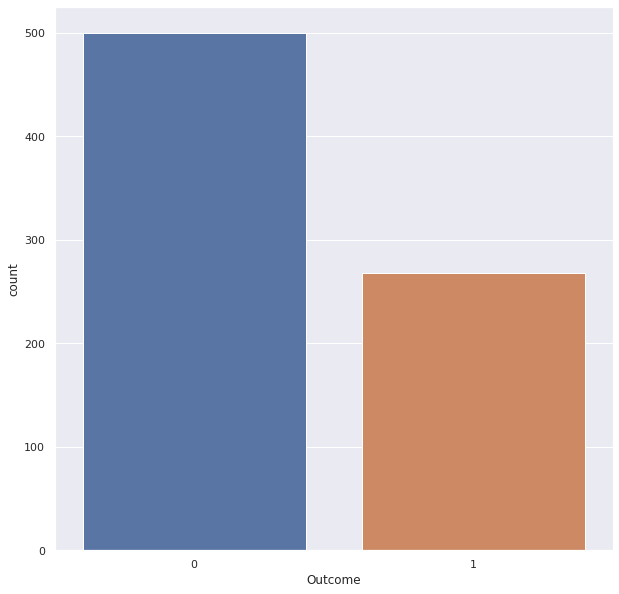

In [46]:
#Countplot for the 'Outcome' column

sns.countplot(x=df['Outcome'])

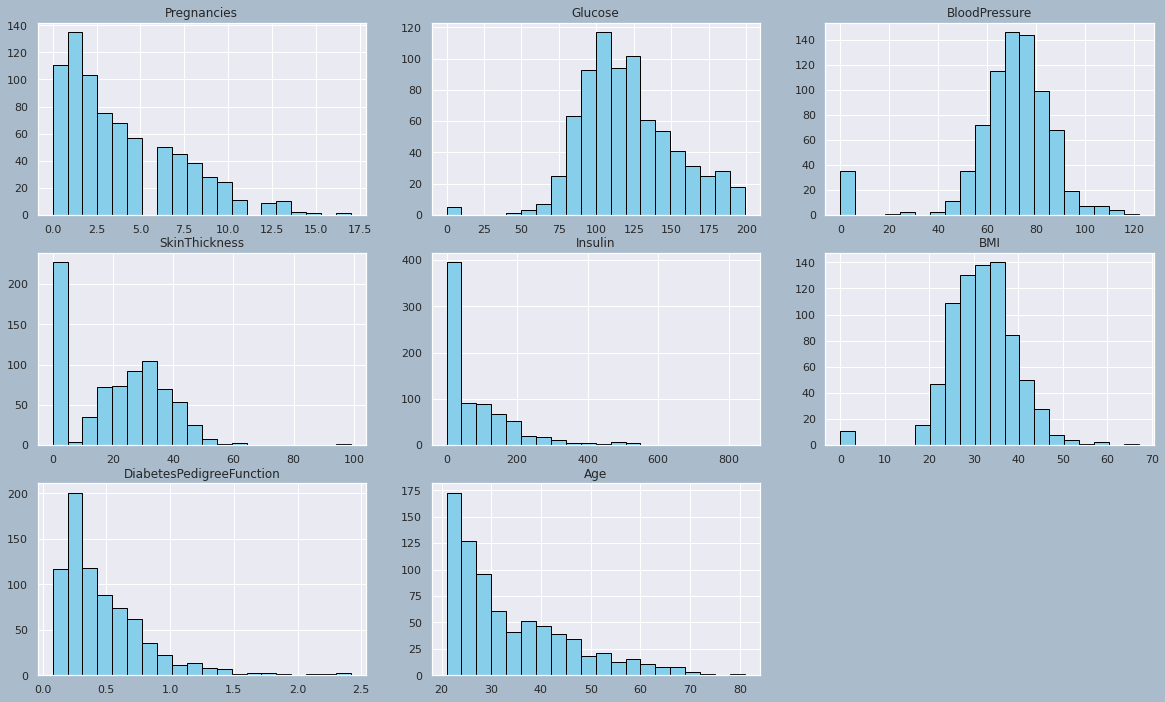

In [10]:
#Distribution plots for all the input features

fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()

Interpretation:
- Insulin and Skin Thickness have a lot of zero values (around 40-50 %). 
- Glucose, Blood Pressure and BMI have a normal distribution
- Age and Number of pregnancies are slighlty right skewed

### Cleaning the data

In [11]:
# Making a copy of the original dataframe

df_imputer = df.copy(deep = True)
df_imputer.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The columns where 0's don't make sense are replaced with NaN to indicate missing values to the computer. These columns include SkinThickness, Insulin, Glucose, BloodPressure, and BMI because it is impossible for a living human being to have 0's in any of these categories.

In [12]:
# Replacement of 0's with NaN in designated columns

df_imputer['SkinThickness'] = df_imputer['SkinThickness'].replace(0,np.nan)
df_imputer['Insulin'] = df_imputer['Insulin'].replace(0,np.nan)
df_imputer['Glucose'] = df_imputer['Glucose'].replace(0,np.nan)
df_imputer['BloodPressure'] = df_imputer['BloodPressure'].replace(0,np.nan)
df_imputer['BMI'] = df_imputer['BMI'].replace(0,np.nan)

Before we do any cleaning of the data, it is important to make sure there is no bias in the data towards missing values. If there is some bias in the missing data, it could make models that we create later on less accurate because they do will not be able to successfully predict Outcome because it cannot account for the biases that might've caused the missing data.

In [13]:
non_zero_vals = df_imputer.dropna()
non_zero_vals.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


In [14]:
zero_vals = df_imputer[df_imputer.isna().any(axis=1)]
zero_vals.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.072543,0.169840,0.119021,-1.0,0.104457,-0.024450,0.413954,0.183252
Glucose,0.072543,1.000000,0.255120,0.312149,NaN,0.257175,0.126837,0.229351,0.476281
BloodPressure,0.169840,0.255120,1.000000,0.214504,-1.0,0.313638,0.069048,0.320148,0.140015
SkinThickness,0.119021,0.312149,0.214504,1.000000,1.0,0.605870,-0.004195,0.168839,0.268949
Insulin,-1.000000,NaN,-1.000000,1.000000,1.0,NaN,1.000000,NaN,NaN
BMI,0.104457,0.257175,0.313638,0.605870,NaN,1.000000,0.122853,0.027726,0.373425
DiabetesPedigreeFunction,-0.024450,0.126837,0.069048,-0.004195,1.0,0.122853,1.000000,0.054801,0.151903
Age,0.413954,0.229351,0.320148,0.168839,NaN,0.027726,0.054801,1.000000,0.144370
Outcome,0.183252,0.476281,0.140015,0.268949,NaN,0.373425,0.151903,0.144370,1.000000


Here we can see that from the correlation values for rows which had no missing values and rows with missing values that there is no significant difference between them. This is evident because the correlation values are close and not significantly different. This means that there is no significant bias that has caused the missing data, so we can use methods like imputation to clean the data

In [15]:
# Finding the total number of null values now that all have been replaced

count_null_values = df_imputer.isnull().sum()
sum(count_null_values)

652

We decided that the best way to deal with all the missing values is using a method called multiple imputation. Multiple imputation is a form of imputation, which is a method of dealing with missing data in data science where other variables or datasets are used to try to fill in the missing data. Old imputation methods relied on using the average or median of observed cases, using another variable for which there was more data that was strongly correlated to predict the missing variable values, or using another dataset. These don't work as well as multiple imputation because they all impose too much precision, and leave us with uncertainty over what the observed values actually were.

Multiple imputation is a new way of dealing with imputation with the advent of cheap computation. Multiple imputation requires that several random values are generated for each missing data point during the imputation, and then analyzing different datasets with different random values to find which randomly generated values fit the best into a linear model. The number of times that these random values are generated is usually equal to the amount of missing data in the dataset. This is beneficial for us because the randomness means that the data won't be too precise which might adversely affect any models we choose to train it on because of overfitting issues.

What we do below is a version of multiple imputation. We decided on this method because we found it to be better than regular multiple imputation because it does not try to impute based on a linear relationship. We don't know if we will end up using linear regression as a machine learning model so we decided to use the iterative imputer instead. The Iterative Imputer from sklearn estimates missing values for a given dataset using the values for all the variables which are present. It specifically uses Bayesian Ridge Regression which estimates a probablity distribution for the values that a variable could be. By getting this distribution the imputer, can fill in the number of missing values with what would comply with the estimated distribution.
- Learn more about multiple imputation [here](https://stats.idre.ucla.edu/stata/seminars/mi_in_stata_pt1_new/)
- Learn more about the Iterative Imputer [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)
- Learn more about Bayesian Ridge Regression [here](https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html)

In [16]:
df_imputer = df_imputer.drop('Outcome', axis=1)

Here we drop Outcome because the Iterative Imputer estimates missing values from the existing data, we didn't want to encode bias towards certain outcomes for the missing values so we had to drop Outcome.

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0, max_iter = 652, sample_posterior = True)
# We set the max iterations to 652 because that was the number of missing values in the dataset
temp = imp.fit_transform(df_imputer)
df_imputer = pd.DataFrame(temp)

In [18]:
df_imputer.head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.000000,239.031415,33.6,0.627,50.0
1,1.0,85.0,66.0,29.000000,241.715092,26.6,0.351,31.0
2,8.0,183.0,64.0,28.110196,78.656465,23.3,0.672,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0


In [19]:
df_imputer['Outcome'] = df['Outcome'] # Adding the outcome column back onto the dataframe
df_imputer.columns = df.columns # Renaming the columns

In [20]:
# Looking at the correlation values after doing imputation on the data
df_imputer.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128303,0.210264,0.103960,0.048829,0.018746,-0.033523,0.544341,0.221898
Glucose,0.128303,1.000000,0.234165,0.233435,0.573149,0.228982,0.136286,0.266616,0.490916
BloodPressure,0.210264,0.234165,1.000000,0.247428,0.134336,0.294603,0.003147,0.325731,0.177617
SkinThickness,0.103960,0.233435,0.247428,1.000000,0.197619,0.635751,0.098700,0.141240,0.248838
Insulin,0.048829,0.573149,0.134336,0.197619,1.000000,0.239506,0.107054,0.209712,0.301494
BMI,0.018746,0.228982,0.294603,0.635751,0.239506,1.000000,0.154858,0.018805,0.306846
DiabetesPedigreeFunction,-0.033523,0.136286,0.003147,0.098700,0.107054,0.154858,1.000000,0.033561,0.173844
Age,0.544341,0.266616,0.325731,0.141240,0.209712,0.018805,0.033561,1.000000,0.238356
Outcome,0.221898,0.490916,0.177617,0.248838,0.301494,0.306846,0.173844,0.238356,1.000000


In [21]:
df_imputer.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.573018,72.297679,28.776391,155.026913,32.442970,0.471876,33.240885,0.348958
std,3.369578,30.535939,12.417967,10.658236,121.601978,6.902052,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,-2.260647,-178.357443,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,76.148600,27.475000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.279268,138.439522,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,35.724350,210.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
df_imputer = df_imputer[(df_imputer['Insulin'] > 0) & (df['SkinThickness'] > 0)]

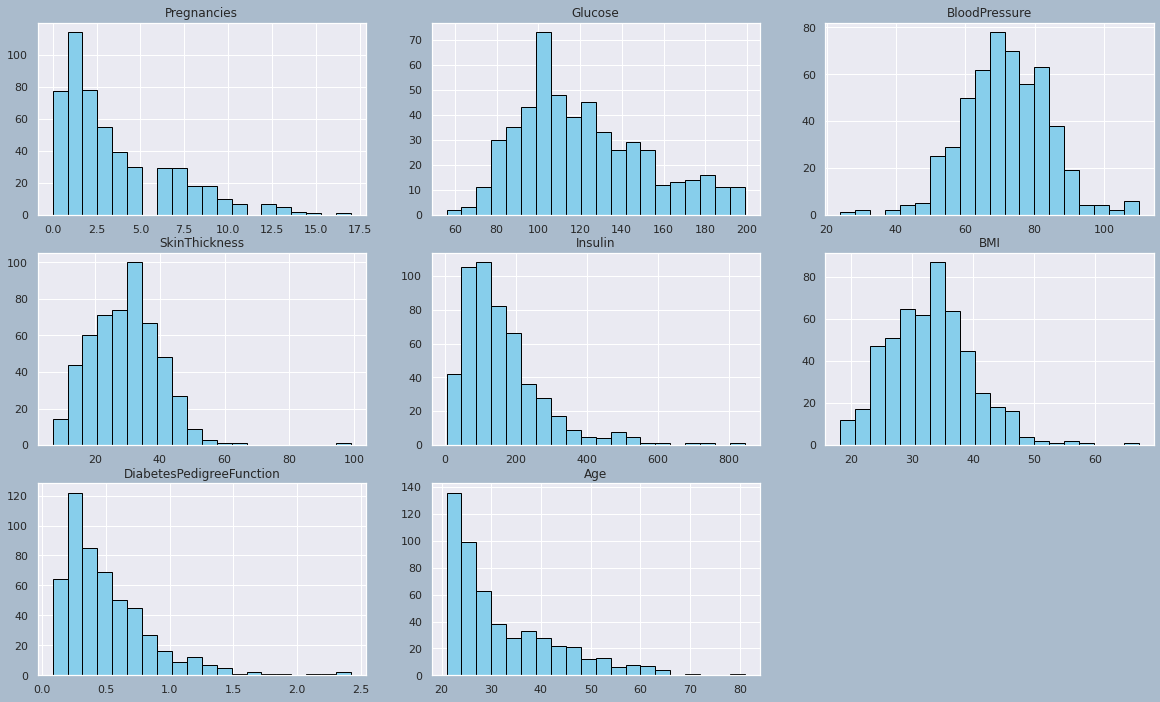

In [23]:
# Looking at histograms for the distribution of values after imputation

fig = plt.figure(figsize=(20,12))
grid = fig.add_gridspec(3,3)

subplot_list = []
for x in range(0,3):
    for y in range(0,3):
        if x != 2 or y != 2:
            subplot_list.append(fig.add_subplot(grid[x,y]))


fig.patch.set_facecolor("#aabbcc")
cols = df.columns
for col, subplot in zip(cols, subplot_list):
    subplot.hist(df_imputer[col], bins = 20, ec="black", color = "skyblue")
    subplot.set_title(col)

plt.show()


In [24]:
# Making sure no more zeros are left in certain columns

column_names = df_imputer.columns
for name in column_names:
    print("Number of zeros in " + name + " = " +  str(len(df_imputer[df_imputer[name] == 0])))

Number of zeros in Pregnancies = 77
Number of zeros in Glucose = 0
Number of zeros in BloodPressure = 0
Number of zeros in SkinThickness = 0
Number of zeros in Insulin = 0
Number of zeros in BMI = 0
Number of zeros in DiabetesPedigreeFunction = 0
Number of zeros in Age = 0
Number of zeros in Outcome = 344


### Exploratory Data Analysis

For our first two plots of exploratory data analysis, we decided to first look at the correlation matrix for the dataset after finishing our imputation method and use a pairplot to see the differences in variable relationships based on Outcome.

<AxesSubplot:>

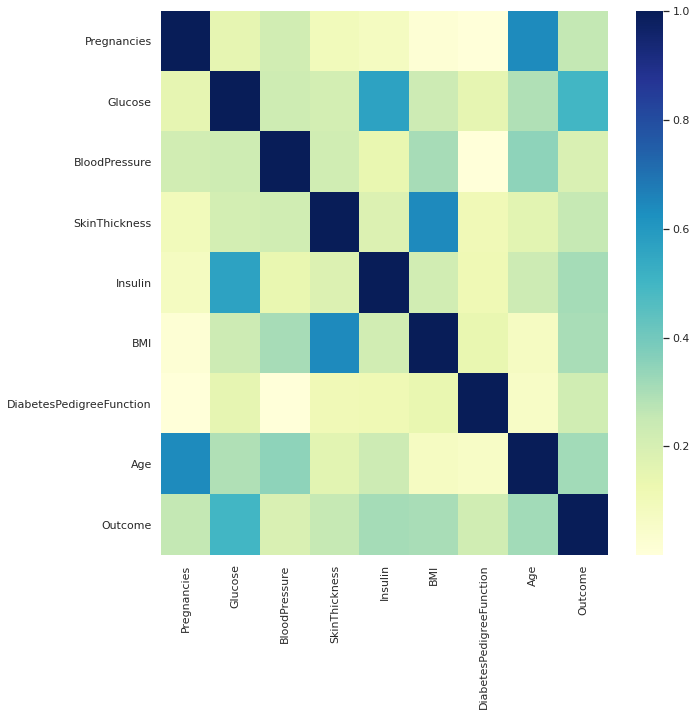

In [25]:
#Heatmap of the imputed dataset

sns.heatmap(df_imputer.corr(), cmap="YlGnBu")

In this correlation matrix, we can see that Insulin and Glucose, Glucose and Outcome, BMI and SkinThickness, and Age and Pregnancies are all relatively highly linearly correlated. The age and pregnancies relationship is not very interesting because it is expected and doesn't have much to do with diabetes. As someone gets older, there is a higher chance they have had more pregnancies because of various factors that are standard with human living conditions. We will take a closer look at the other three relationships in the rest of our Exploratory Data Analysis.

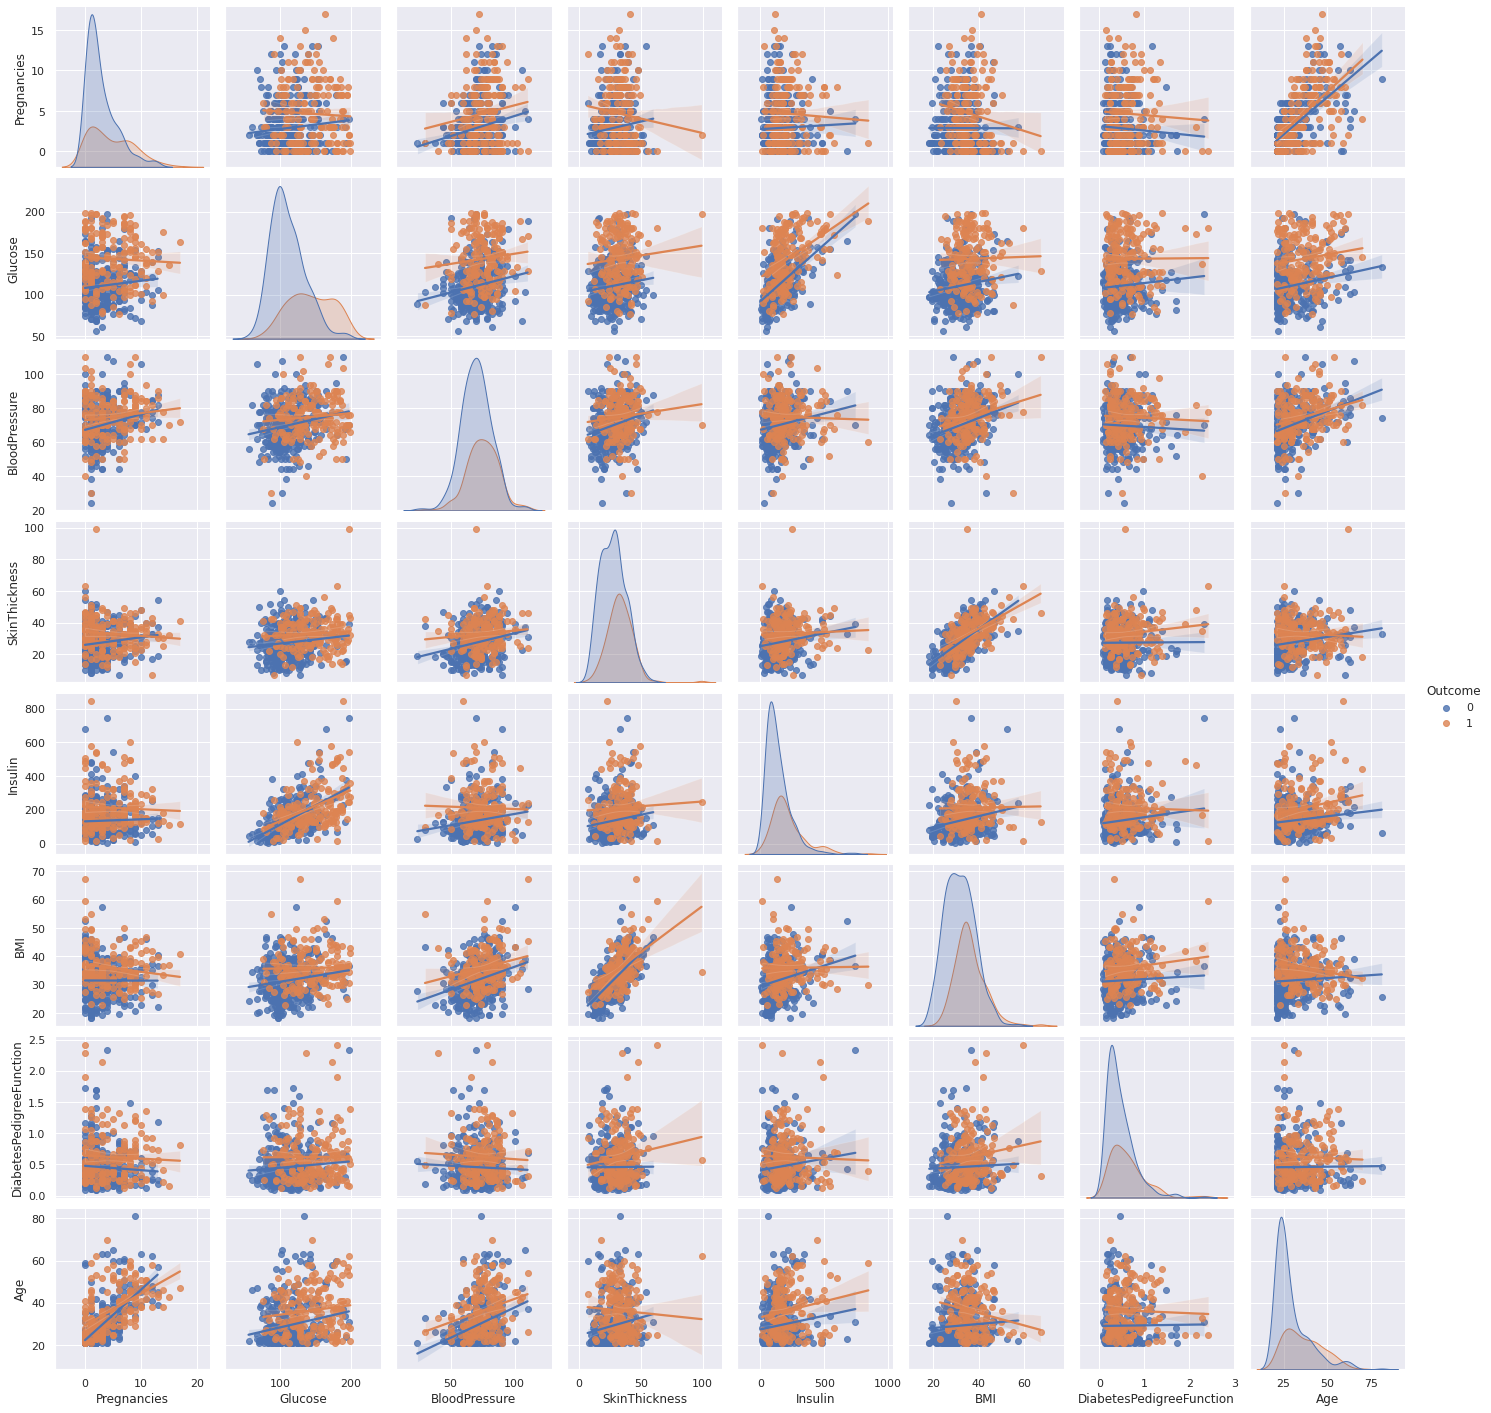

In [26]:
#Plotting pairwise relationships in the dataset of the features using pairplot() function

sns.pairplot(df_imputer, kind="reg", hue='Outcome')

This pairplot helps contextualize the differences in relationships among variables and how outcome affects those relationships. This plot, formatted like the correlation matrix consists of scatterplots in most of the grid and distribution charts along the top-left bottom-right diagonal separated by outcome. In the scatterplots, one can see the linear regressions for the relationships between variables for Outcome 0 (no diabetes) and Outcome 1 (diabetes). From the scatter plots, we can see some moderately significant differences in the linear regressions for Outcome 1 and Outcome 0. This means that the relationships between different variables, are somewhat affected by the presence of diabetes. From the distribution charts along the diagonal, we can see significant differences in the distributions of the variables for people who had diabetes and those who did not. For example, the distribution plot for Glucose shows that those with no diabetes had lower Glucose levels than those with diabetes. This makes sense because diabetes can affect your production of insulin in your body and without insulin glucose in your blood will stay in your blood instead of being converted into energy. So those with diabetes would have higher levels of glucose. Learn more [here](https://wa.kaiserpermanente.org/healthAndWellness/index.jhtml?item=%2Fcommon%2FhealthAndWellness%2Fconditions%2Fdiabetes%2FinsulinProcess.html). We will take a closer look at the effects of glucose on outcome in the following plots.

Text(0, 0.5, 'Glucose (mg/dL)')

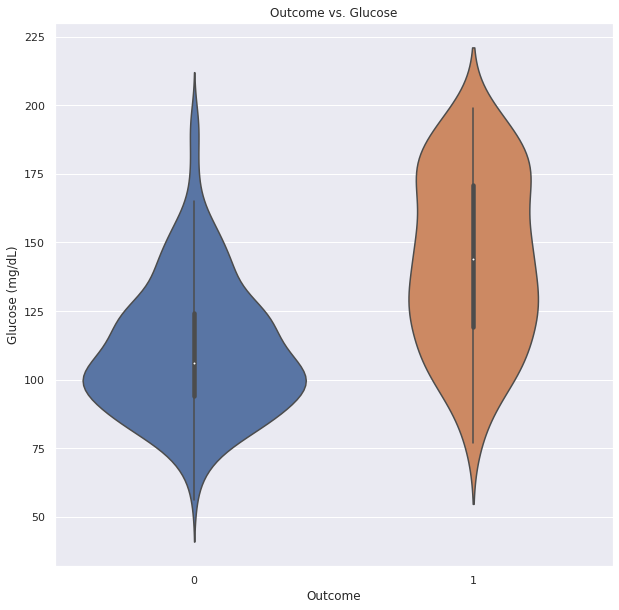

In [73]:
#Violin plot of Outcome vs Glucose

sns.violinplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Outcome vs. Glucose")
plt.ylabel("Glucose (mg/dL)")

We can see from this violin plot the differences in the distributions of glucose values for those with diabetes and those without diabetes. Glucose values for people without diabetes have a mode closer to 100 mg/dL while the distribution of glucose values for those with diabetes is more bimodal, with modes occuring around 125 mg/dL and 180 mg/dL. This will most likely be a significant factor is machine learning models that we create later on because of the large difference in glucose levels between those with and without diabetes. We can use a boxplot to further visualize the differences in glucose levels for those with and without diabetes.

Text(0, 0.5, 'Glucose (mg/dL)')

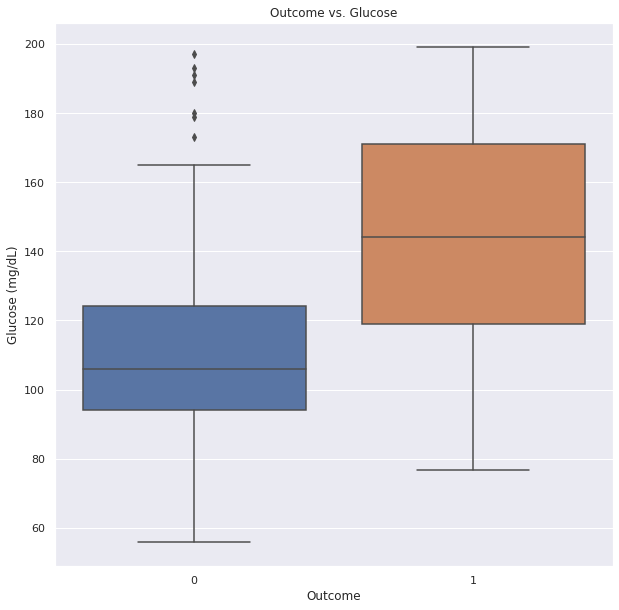

In [72]:
#Boxplot of Outcome vs. Glucose

sns.boxplot(data=df_imputer, x = 'Outcome', y = 'Glucose')
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Outcome vs. Glucose")
plt.ylabel("Glucose (mg/dL)")

Here we can see that the mean for glucose for people without diabetes is around 110 mg/dL while the mean for glucose for people with diabetes is around 145 mg/dL. This further illustrates the difference in glucose for those with and without diabetes.
***

Next we will try to visualize the relationship between Insulin and Glucose.

Text(0, 0.5, 'Glucose (mg/dL)')

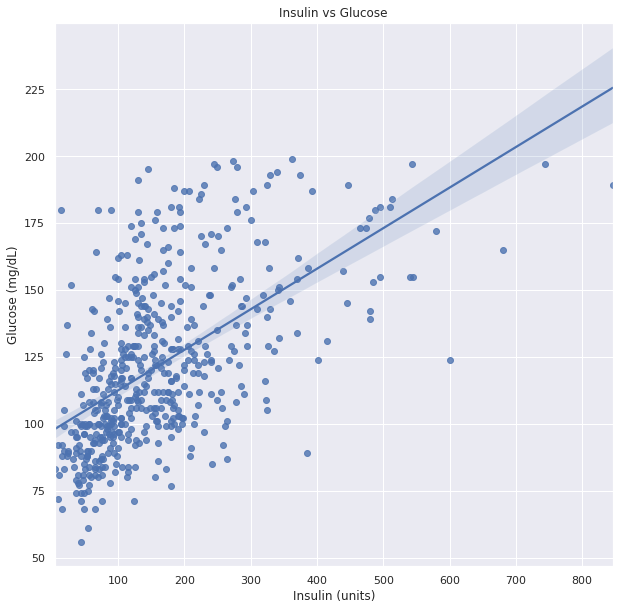

In [74]:
#Regression plot of Glucose vs. Insulin

sns.regplot(data=df_imputer, x = 'Insulin', y = 'Glucose')
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Insulin vs Glucose")
plt.xlabel("Insulin (units)")
plt.ylabel("Glucose (mg/dL)")

From this scatterplot and line of best fit, we can see the relationship between insulin and glucose. There seems to be a higher correlation for lower Insulin values (40-160 units) with glucose with a steeper linear trend. Beyond that insulin levels seem to have varying glucose levels. The linear regression shows a positive relationship between insulin and glucose. Below we will take a look at how the presence of diabetes affects this relationship.

Text(0.5, 1.0, 'Insulin vs Glucose')

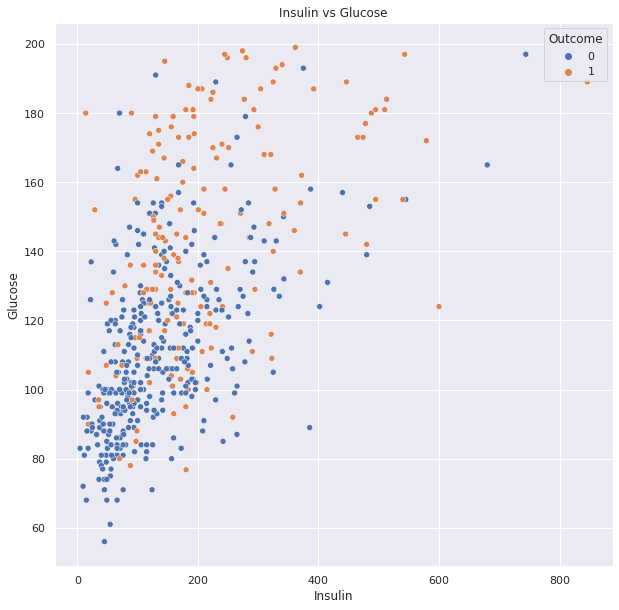

In [31]:
#Scatterplot of Insulin vs. Glucose categorized on outcome value

sns.scatterplot(data=df_imputer, x = 'Insulin', y = 'Glucose', hue = 'Outcome')
sns.set(rc={'figure.figsize':(12,12)})
plt.title("Insulin vs Glucose")

This chart shows how the presence of diabetes affects the distribution of insulin and glucose. Orange hued dots correspond with positive diabetes outcomes and blue dots correspond with negative diabetes outcomes. What we can see from the scatter plot is that those without diabetes are concentrated in the lower left of the plot, meaning low insulin and glucose. Those with diabetes however, are spread throughout the plot. This is most likely a symptom of different types of diabetes including low production of insulin, which would have points in the top left, and high resistance to insulin which would have perhaps higher insulin levels which could explain the large distribution of orange points.
***

Next we will look at the relationship between BMI and SkinThickness, another relationship we saw was highly correlated in the correlation matrix.

Text(0.5, 1.0, 'Skin Thickness vs BMI')

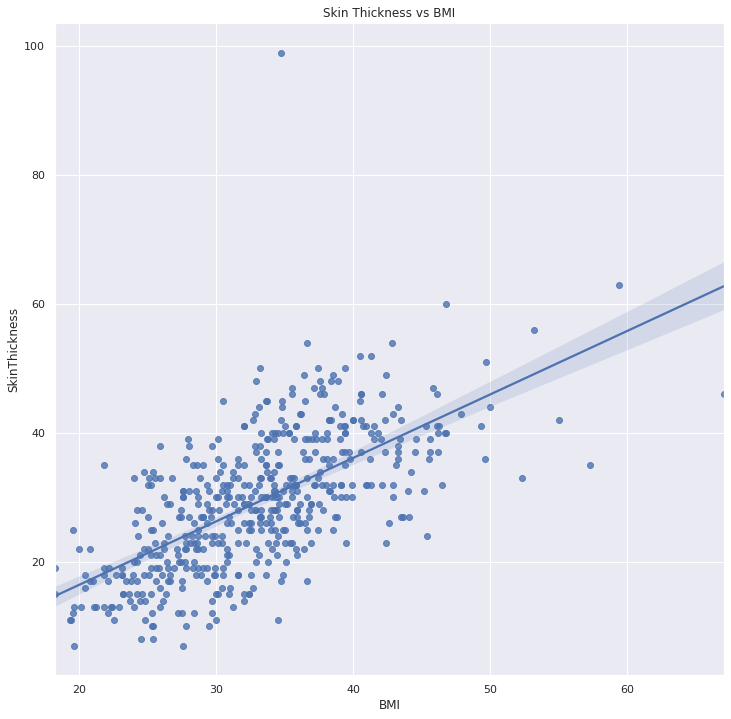

In [32]:
#Regression plot of SkinThickness vs BMI

sns.regplot(data=df_imputer, x = 'BMI', y = 'SkinThickness')
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Skin Thickness vs BMI")

What we can see here is a scatter plot of BMI vs. Skin Thickness. There is a high density of points around the lower to mid values of BMI and SkinThickness. In addition, the linear regression shows a clear positive relationship between the two variables. Next we will take a look at how the presence of diabetes affects this relationship.

Text(0.5, 1.0, 'Skin Thickness vs. BMI')

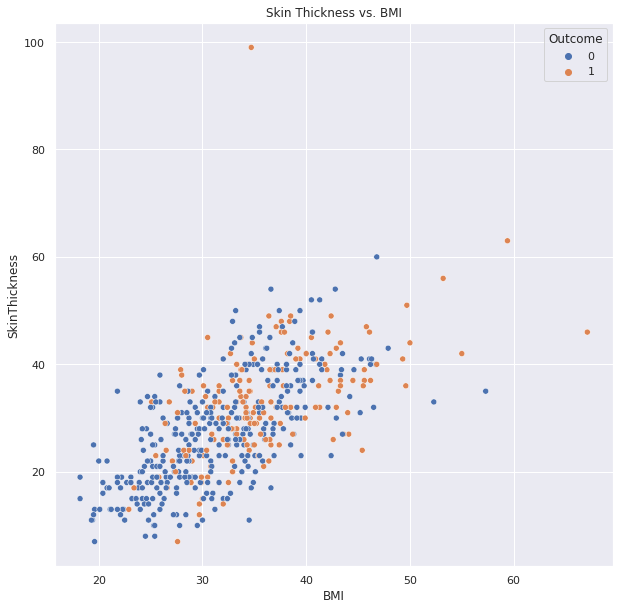

In [33]:
#Scatterplot of Skin Thickness vs. BMI categorized on outcome value

sns.scatterplot(data=df_imputer, x = 'BMI', y = 'SkinThickness', hue = 'Outcome')
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Skin Thickness vs. BMI")

What we can see from this plot, which is colored the same as the plot for Insulin and Glucose, is that the distribution of BMI and Skin Thickness is relatively similar for those with and without diabetes. Although it does look like those with diabetes had somewhat higher BMIs and Skin Thicknesses, this distinction doesn't seem too significant. This relationship will likely play a role in our machine learning models but not a large one.

In [34]:
df_imputer.corr('spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.132260,0.179346,0.081131,0.119704,-0.016409,0.008527,0.646844,0.208170
Glucose,0.132260,1.000000,0.249475,0.215412,0.603102,0.224728,0.107125,0.290027,0.479414
BloodPressure,0.179346,0.249475,1.000000,0.245186,0.164184,0.315847,0.012092,0.375467,0.201381
SkinThickness,0.081131,0.215412,0.245186,1.000000,0.228168,0.678838,0.063331,0.222146,0.258960
Insulin,0.119704,0.603102,0.164184,0.228168,1.000000,0.253753,0.088616,0.252661,0.349954
BMI,-0.016409,0.224728,0.315847,0.678838,0.253753,1.000000,0.102399,0.165747,0.297701
DiabetesPedigreeFunction,0.008527,0.107125,0.012092,0.063331,0.088616,0.102399,1.000000,0.093118,0.226881
Age,0.646844,0.290027,0.375467,0.222146,0.252661,0.165747,0.093118,1.000000,0.370850
Outcome,0.208170,0.479414,0.201381,0.258960,0.349954,0.297701,0.226881,0.370850,1.000000


Here we are doing a correlation matrix, but specifically a Spearman correlation matrix. This will give us values for the relationships between variables that are not just predicated on linearity. Instead it looks at monotonic relationships so we used this to see if there was any kind of relationship between the variables even if it was not strictly linear. The Spearman test used to create this matrix will be explained below.

## Hypothesis

### <u>Hypothesis statement</u>: All variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age) are significantly correlated to whether someone has diabetes or not (Outcome).

What we can see from the output of the Spearman correlation test is the correlation between Outcome and all the other variables. Because we are attempting to predict diabetes, we would like to include, in our machine learning model, variables which are correlated with Outcome to some degree. From the table above, we can see that all variables have correlation values of above 0.2. We think that this means that they are all correlated to Outcome in some way, to some degree. From, this we formulate our hypothesis as such: 

All variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age) are significantly correlated to whether someone has diabetes or not (Outcome).

Therefore the null hypothesis will be: All variables are not significantly correlated to whether someone has diabetes or not (Outcome).
***

Here we do a Spearman's Rank Correlation test, which tests if two variables have a montonic relationship and gives a significance value in the form of a p-value to indicate how significant the relationship is. The coefficient indicates, on a scale of -1 to +1, how close one variable is to being a perfect monotone of the other. A monotonic relationship is where when the size of one variable increases, the size of the other variable either increases or decreases. 
- Learn more about Monotonic Relationships [here](https://www.discoverphds.com/blog/monotonic-relationship#:~:text=The%20term%20monotonic%20relationship%20is,the%20other%20variable%20also%20decreases.)
- Learn more about Spearman's Rank Correlation test [here](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

In [35]:
#Spearman test

d1= df_imputer.drop('Outcome', axis=1)

d2 = np.array(df_imputer['Outcome'])

for value in d1.columns:
    temp = np.array(df_imputer[value])
    stat, p = st.spearmanr(temp, d2)
    print(value)
    print('stat=%.3f, p=%.8f' % (stat, p))

    if p > 0.05:
        print('Probably independent\n')
    elif p == 0:
        print("Fail")
    else:
        print('Probably Dependent\n')

Pregnancies
stat=0.208, p=0.00000168
Probably Dependent

Glucose
stat=0.479, p=0.00000000
Probably Dependent

BloodPressure
stat=0.201, p=0.00000368
Probably Dependent

SkinThickness
stat=0.259, p=0.00000000
Probably Dependent

Insulin
stat=0.350, p=0.00000000
Probably Dependent

BMI
stat=0.298, p=0.00000000
Probably Dependent

DiabetesPedigreeFunction
stat=0.227, p=0.00000017
Probably Dependent

Age
stat=0.371, p=0.00000000
Probably Dependent



As we can see from the results of the Spearman's rank correlation test, the p-values for all of these variables' correlation with Outcome is below 0.05. P-value is the probability of obtaining results at least as extreme as those actually observed under the assumption that the null hypothesis is actually correct. This means that a very small p-value, or 0.05, indicates that such observed outcomes would be unlikely if the null hypothesis was true. So therefore a small p-value allows us to reject the null hypothesis. Because 0.05 is within our accepted bounds that means for these variables, the correlation with Outcome is statistically significant. This means we reject the null hypothesis.
- Learn more about p-values [here](https://en.wikipedia.org/wiki/P-value)

## Machine Learning

We decided to use two different types of Machine Learning models.
- Logistic Regression
- Random Forests

In [36]:
# Separating independent variables and the dependent variable

X = df_imputer.drop('Outcome', axis = 1)
Y = df_imputer['Outcome']

### Train + Test

In [37]:
#Using the sklearn train_test_split, we will split the entire
#X and Y dataframe such that training set accounts for 70% of total

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size  = 0.7)

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,max_iter = 768).fit(X_train, Y_train)

In [39]:
# Logistic Regression score for the training dataset

lr.score(X_train, Y_train)

0.7857142857142857

In [40]:
# Logisitic Regression score for the testing dataset

lr.score(X_test, Y_test)

0.7884615384615384

In [41]:
# Logisitic Regression score for the entire dataset

lr.score(X, Y)

0.7865384615384615

In [42]:
predictions = lr.predict(X_test)

In [43]:
# Getting Residuals for Logistic Regression

diff = []
for i in range(0, 154):
    value = abs(Y_test.iloc[i] - predictions[i])
    diff.append(value)

Text(0, 0.5, 'Total number of residuals')

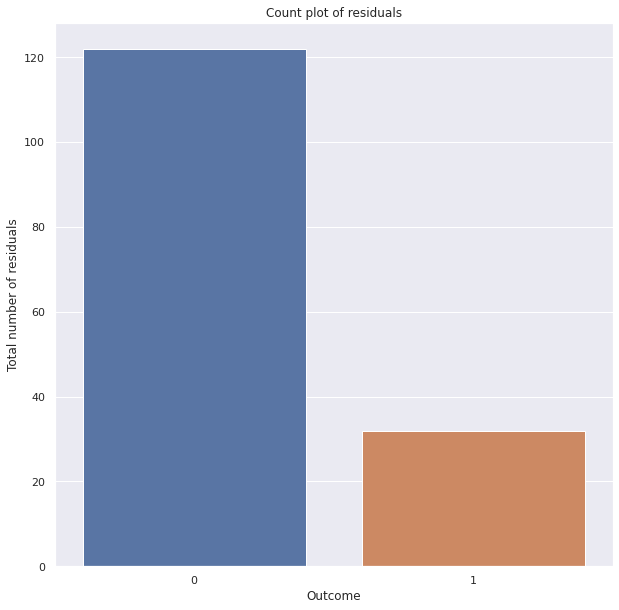

In [45]:
sns.countplot(x=diff)
plt.title("Count plot of residuals")
plt.xlabel("Outcome")
plt.ylabel("Total number of residuals")

### Random forest

In [47]:
X = df_imputer.drop('Outcome', axis = 1)
Y = df_imputer['Outcome']
#Using the sklearn train_test_split, we will split the entire
#X and Y dataframe such that training set accounts for 70% of total

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size  = 0.7)

In [48]:
#Random Forset Classifier without hyper-parameter tuning
#Train and fit our model

randomForest = RandomForestClassifier(random_state = 0, n_jobs = -1)
randomForest.fit(X_train, Y_train)

rf_predictions = randomForest.predict(X_test)


In [49]:
print(classification_report(Y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       100
           1       0.83      0.54      0.65        56

    accuracy                           0.79       156
   macro avg       0.81      0.74      0.75       156
weighted avg       0.80      0.79      0.78       156



In [50]:
print(confusion_matrix(Y_test, rf_predictions))

[[94  6]
 [26 30]]


### Randomized Search CV

In [51]:
#Randomized search CV
n_estimators =  [20, 100, 200, 500, 1000, 2000]
max_features = ['auto', 'sqrt', 'log2', 0.6]
max_depth = [2, 5, 7, 12, 15, 20]
min_samples_split = [2, 5, 8, 14, 20]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]
max_leaf_nodes = [50, 200, 300, 500, 600, 750]

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes, 
              }

randomForest2 = RandomForestClassifier(random_state = 0, n_jobs = -1)
r_clf = RandomizedSearchCV(randomForest2, random_grid, n_iter=100, cv = 10, random_state=42, n_jobs = -1)

In [52]:
r_clf.fit(X_train, Y_train)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 7, 12, 15, 20],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         0.6],
                                        'max_leaf_nodes': [50, 200, 300, 500,
                                                           600, 750],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 8, 14, 20],
                                        'n_estimators': [20, 100, 200, 500,
                                                         1000, 2000]},
                   random_state=42)

In [53]:
r_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 600,
 'max_features': 'auto',
 'max_depth': 7,
 'bootstrap': True}

### Grid Search CV

In [56]:
#Train and fit our model

randomForest3 = RandomForestClassifier(random_state = 0, n_jobs = -1)
n_estimators = [75, 100, 125, 150]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [5, 7, 8, 10, 12]
min_samples_split = [12, 14, 16, 18, 20]
min_samples_leaf = [1, 2, 5, 10]
bootstrap = [True, False]
max_leaf_nodes = [500, 550, 600, 650, 700]


parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes}

clf = GridSearchCV(randomForest3, parameters, cv = 10)

In [57]:
clf.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 7, 8, 10, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [500, 550, 600, 650, 700],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [12, 14, 16, 18, 20],
                         'n_estimators': [75, 100, 125, 150]})

In [58]:
clf.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 500,
 'min_samples_leaf': 5,
 'min_samples_split': 16,
 'n_estimators': 75}

In [59]:
grid_predictions = clf.predict(X_test)

In [60]:
conf_matrix_grid = confusion_matrix(Y_test, grid_predictions)
print(conf_matrix_grid)

[[91  9]
 [25 31]]


In [61]:
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.78      0.55      0.65        56

    accuracy                           0.78       156
   macro avg       0.78      0.73      0.74       156
weighted avg       0.78      0.78      0.77       156



In [66]:
randomForest4 = RandomForestClassifier(random_state = 0, n_jobs = -1)
n_estimators = [75, 200]
max_features = ['auto']
max_depth = [7]
min_samples_split = [15, 16]
min_samples_leaf = [5]
bootstrap = [False]
max_leaf_nodes = [150, 200, 250, 500]


parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap,
             'max_leaf_nodes': max_leaf_nodes}

clf2 = GridSearchCV(randomForest4, parameters, cv = 10)

In [67]:
clf2.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'bootstrap': [False], 'max_depth': [7],
                         'max_features': ['auto'],
                         'max_leaf_nodes': [150, 200, 250, 500],
                         'min_samples_leaf': [5], 'min_samples_split': [15, 16],
                         'n_estimators': [75, 200]})

In [68]:
clf2.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': 150,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 75}

In [69]:
grid_predictions = clf2.predict(X_test)
conf_matrix_grid = confusion_matrix(Y_test, grid_predictions)
print(conf_matrix_grid)

[[91  9]
 [26 30]]


Text(0.5, 1, 'Confusion Matrix on the Test Data')

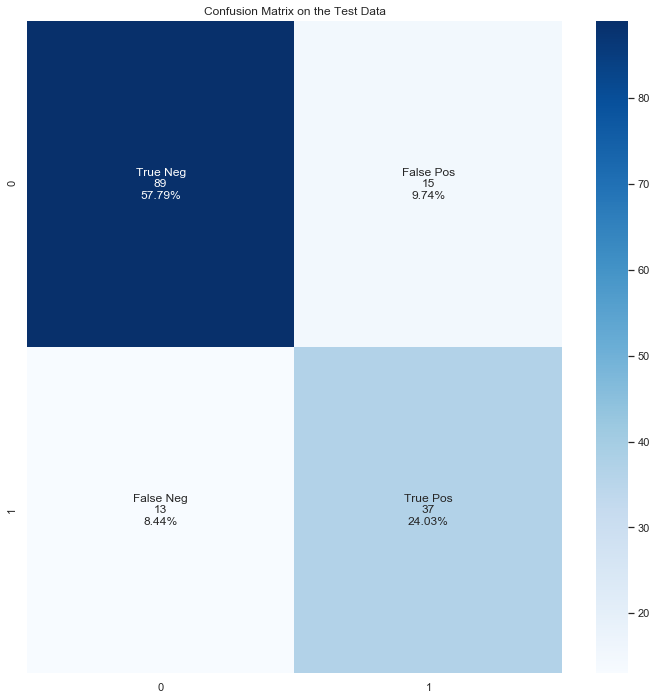

In [340]:
names = ['True Negative','False Positive','False Negative','True Positive']

flatten = conf_matrix_grid.flatten()

counts = [value for value in flatten]

percentages = ["{0:.2%}".format(value) for value in
                    flatten/np.sum(conf_matrix_grid)]

labels = []


for i in range(0,4):
    label = f"{names[i]}\n{counts[i]}\n{percentages[i]}"
    labels.append(label)

labels = np.asarray(labels).reshape(2,2)

g = sns.heatmap(conf_matrix_grid, annot=labels, fmt='', cmap='Blues');

g.set_title("Confusion Matrix on the Test Data")

In [ ]:
flat = conf_matrix_grid.flatten()
score = (flat[0] + flat[3]) / flat.sum()
print(score)